<a href="https://colab.research.google.com/github/pengc7/DS5220/blob/main/DS5220_Project_Group9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [2]:
df1 = pd.read_csv('sales data-set.csv')
df2 = pd.read_csv('stores data-set.csv')
df3 = pd.read_csv('Features data set.csv')
print(df1.head())
print(df2.head())
df3['Date'] = df3['Date'].apply(lambda x: pd.to_datetime(x, format='%d/%m/%Y'))
df3 = df3.sort_values(['Date'])
print(df3.head())

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875
      Store       Date  Temperature  ...         CPI  Unemployment  IsHoliday
0         1 2010-02-05        42.31  ...  211.096358         8.106      False
2730     16 2010-02-05        19.79  ...  189.381697         7.039      False
5460     31 2010-02-05        39.05  ...  210.752605         8.324      False
3640     21 2010-02-05        39.05  ...  210.752605         8.324      False
4550     26 2010-02-05         9.55  ...  131.527903         8.488      False

[5 rows x 12 columns]


In [3]:
#merge predictor and target variable
df1_store = df1.groupby(['Store','Date'])['Weekly_Sales'].sum().reset_index(name='Weekly_Sales')
df1_store['Date'] = df1_store['Date'].apply(lambda x: pd.to_datetime(x, format='%d/%m/%Y'))
df1_store = df1_store.sort_values(['Date'])
df3_merged = pd.merge(df1_store, df3, on = ['Store','Date'])
df3_merged = pd.merge(df2, df3_merged, on = ['Store'])
df3_merged = df3_merged.sort_values(['Date','Store'])
#df3_merged

In [4]:
#choose valid Markdown
df3_markdown = df3_merged.loc[df3_merged['Date']>'2011-11'] #valid MarkDown 
#df3_markdown

In [5]:
df3_markdown['Year'] = pd.DatetimeIndex(df3_markdown['Date']).year
df3_markdown['Month'] = pd.DatetimeIndex(df3_markdown['Date']).month
df3_markdown['Day']= pd.DatetimeIndex(df3_markdown['Date']).day

#df3_markdown

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [6]:
#transform date to numeric value
df3_markdown['Date']=df3_markdown['Date'].map(datetime.toordinal)
df3_markdown = df3_markdown.reset_index(drop=True)
#df3_markdown

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
#transform boolean variables
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='if_binary') #drop one category, reduce correlation
oe_results = encoder.fit_transform(df3_markdown[["IsHoliday"]])
cols = encoder.get_feature_names_out(['IsHoliday'])
df3_markdown = df3_markdown.join(pd.DataFrame(oe_results.toarray(), columns=cols))
df3_markdown.drop('IsHoliday', axis=1, inplace=True)

df3_markdown['Type'] = df3_markdown['Type'].replace(['A'],2)
df3_markdown['Type'] = df3_markdown['Type'].replace(['B'],1)
df3_markdown['Type'] = df3_markdown['Type'].replace(['C'],0)

#df3_markdown

In [8]:
#Markdown missing value imputation
df3_markdown['MarkDown1'] = df3_markdown['MarkDown1'].fillna(0)
df3_markdown['MarkDown2'] = df3_markdown['MarkDown2'].fillna(0)
df3_markdown['MarkDown3'] = df3_markdown['MarkDown3'].fillna(0)
df3_markdown['MarkDown4'] = df3_markdown['MarkDown4'].fillna(0)
df3_markdown['MarkDown5'] = df3_markdown['MarkDown5'].fillna(0)
#df3_markdown

In [ ]:
#Impute missing values in CPI, Unemployment with MissForest
#no need, no more missing values
'''
!pip install missingpy 
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
imputer = MissForest()
df_imputed = pd.DataFrame(imputer.fit_transform(df3_markdown), columns = list(df3_markdown.columns))
df_imputed.head()
'''

"\n!pip install missingpy \nimport sklearn.neighbors._base\nimport sys\nsys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base\nfrom missingpy import MissForest\nimputer = MissForest()\ndf_imputed = pd.DataFrame(imputer.fit_transform(df3_markdown), columns = list(df3_markdown.columns))\ndf_imputed.head()\n"

EDA

   Store  Type    Size    Date  ...  Month  Day  IsHoliday_True  Level
0      1     2  151315  734445  ...     11    4             0.0   high
1      2     2  202307  734445  ...     11    4             0.0   high
2      3     1   37392  734445  ...     11    4             0.0    low
3      4     2  205863  734445  ...     11    4             0.0   high
4      5     1   34875  734445  ...     11    4             0.0    low

[5 rows x 19 columns]


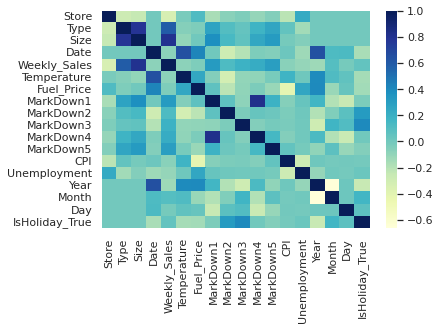

In [9]:
data_clean = df3_markdown

import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Type", y="Weekly_Sales", data=data_clean, palette="Set3")

data_clean['Level'] = pd.qcut(data_clean['Weekly_Sales'], q=2, labels=['low','high'])
print(data_clean.head())

#data_clean.describe()
corr = data_clean.corr()
sns.heatmap(corr,cmap="YlGnBu")

Text(0.5, 1.0, 'Weekly Sales variation with time')

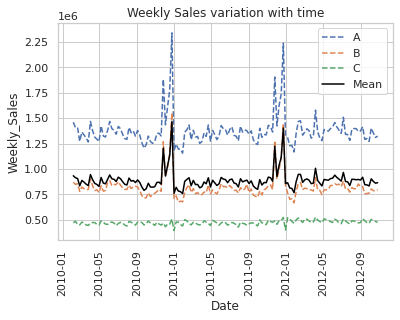

In [10]:
import matplotlib.pyplot as plt

df = df3_merged.groupby(['Type','Date'])['Weekly_Sales'].mean().reset_index(name='Mean')

df1 = df[df['Type']=='A']
df2 = df[df['Type']=='B']
df3 = df[df['Type']=='C']
sns.lineplot(x='Date', y='Mean',data=df1,linestyle='--')
sns.lineplot(x='Date', y='Mean',data=df2,linestyle='--')
sns.lineplot(x='Date', y='Mean',data=df3,linestyle='--')

df4 = df.groupby(['Date'])['Mean'].mean().reset_index(name='Mean')
sns.lineplot(x='Date', y='Mean',data=df4,color='black')
plt.legend(labels=['A','B','C','Mean'])
plt.xticks(rotation=90)
plt.ylabel('Weekly_Sales')
plt.title('Weekly Sales variation with time')

Text(0.5, 1.0, 'Number of Stores in each type')

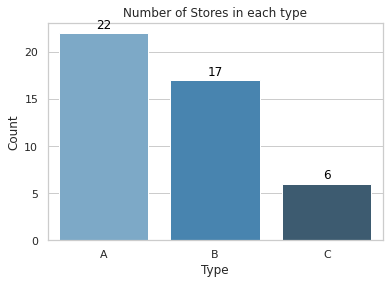

In [11]:
stores = df3_merged.groupby(['Type'])['Store'].nunique().reset_index(name='StoreNum')
plt1 = sns.barplot(x='Type',y='StoreNum',data = stores,palette="Blues_d")
for index, row in stores.iterrows():
    plt1.text(row.name,row[1]+0.5, row[1], color='black', ha="center")
plt.ylabel('Count')
plt.title('Number of Stores in each type')

Models

Linear regression

   Store    Size  Temperature  Fuel_Price  ...  Year  Month  Day  IsHoliday_True
0      1  151315        54.98       3.332  ...  2011     11    4             0.0
1      2  202307        55.53       3.332  ...  2011     11    4             0.0
2      3   37392        59.31       3.332  ...  2011     11    4             0.0
3      4  205863        49.86       3.322  ...  2011     11    4             0.0
4      5   34875        56.71       3.332  ...  2011     11    4             0.0

[5 rows x 14 columns]
                  Coefficient
Store           -81407.365222
Size            277159.351831
Temperature       6702.592964
Fuel_Price        6386.107028
MarkDown1        44384.162280
MarkDown2        13047.293141
MarkDown3        60035.310862
MarkDown5        45031.672968
CPI             -40538.283841
Unemployment    -29911.875987
Year            -31263.665461
Month            31709.363021
Day               5919.042359
IsHoliday_True   -4535.616004
1.0
R square:  0.6548382578003831
345514.

Text(0.5, 1.0, 'Regression coefficients')

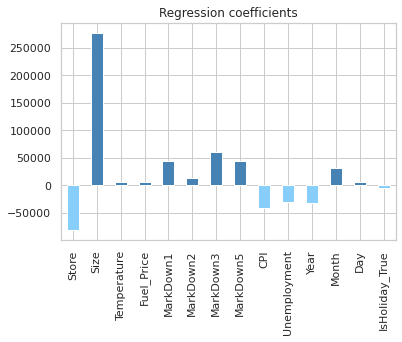

In [12]:
#regression model
from sklearn.linear_model import ElasticNetCV
from sklearn import metrics
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

trn = data_clean[:int(len(data_clean)*0.8)]
tst = data_clean[int(len(data_clean)*0.8):]

xvars = [0,2,5,6,7,8,9,11,12,13,14,15,16,17]
X_trn = trn.iloc[:,xvars]
y_trn = trn.iloc[:,4]
print(X_trn.head())

alphas = [1e10-5,1e10-3,1e10-1, 1]
lm = make_pipeline(StandardScaler(), ElasticNetCV(cv=5, alphas = alphas))
lm.fit(X_trn,y_trn)

namesteps = lm.named_steps['elasticnetcv']
coeff_df = pd.DataFrame(namesteps.coef_, X_trn.columns, columns=['Coefficient'])
print(coeff_df)

y_pred = lm.predict(X_trn)
print(namesteps.alpha_)
rsquare = lm.score(X_trn,y_trn)
trn_err = np.sqrt(metrics.mean_squared_error(y_trn, y_pred))
print('R square: ', rsquare)
print(trn_err)

#sns.barplot(x = coeff_df.index, y = 'Coefficient', platte = )
coeff_df['Coefficient'].plot(kind = 'bar', rot = 90, color=(coeff_df['Coefficient'] > 0).map({True: 'steelblue',
                                                    False: 'lightskyblue'}))
#plt.xticks(rotation=90)
plt.title('Regression coefficients')

In [13]:
#test
X_tst = tst.iloc[:,xvars]
y_tst = tst.iloc[:,4]
y_pred_tst = lm.predict(X_tst)

rscore_tst = lm.score(X_tst,y_tst)
print(rscore_tst)

from sklearn import metrics 
print('mae:', metrics.mean_absolute_error(y_tst,y_pred_tst))
print('mse:', metrics.mean_squared_error(y_tst,y_pred_tst))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_tst,y_pred_tst))) 

0.691540895739974
mae: 239653.08462562002
mse: 83711525311.25244
rmse: 289329.44079587277


ARIMA

In [14]:
df = df3_merged.groupby(['Date','Type'])['Weekly_Sales'].mean().reset_index(name='Weekly_Sales')
df1 = df[df['Type']=='C']['Weekly_Sales']
t = int(len(df1)*0.8)
trn = df1[:t]
tst = df1[t:]

In [15]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(trn.dropna())
print('p-value: %f' % result[1])

p-value: 0.527045


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


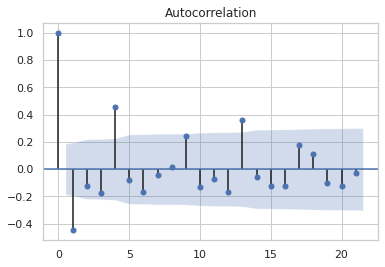

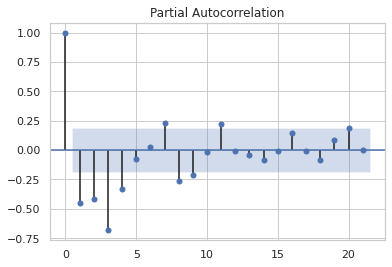

In [16]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(trn.diff().dropna()) 
plot_pacf(trn.diff().dropna())
pyplot.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:         D.Weekly_Sales   No. Observations:                  113
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -1256.683
Method:                       css-mle   S.D. of innovations          16110.464
Date:                Wed, 15 Dec 2021   AIC                           2527.366
Time:                        03:52:48   BIC                           2546.457
Sample:                             1   HQIC                          2535.113
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  227.6800    278.507      0.818      0.415    -318.184     773.543
ar.L1.D.Weekly_Sales    -1.0266      0.182     -5.638      0.000      -1.383      -0.670
ar.L2.D.Week

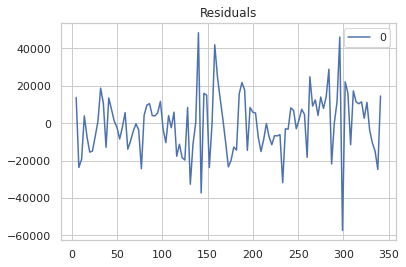

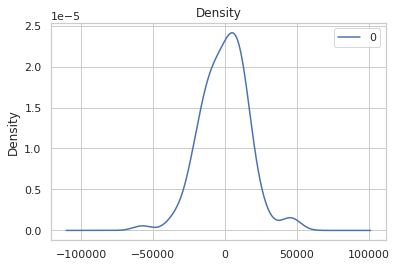

In [17]:
from statsmodels.tsa.arima_model import ARIMA

p,q = 4,1
d = 1
model = ARIMA(trn.dropna(), order=(p,d,q))

model_fit = model.fit()
print(model_fit.summary())

residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title="Residuals")
residuals.plot(kind='kde', title='Density')

pyplot.show()

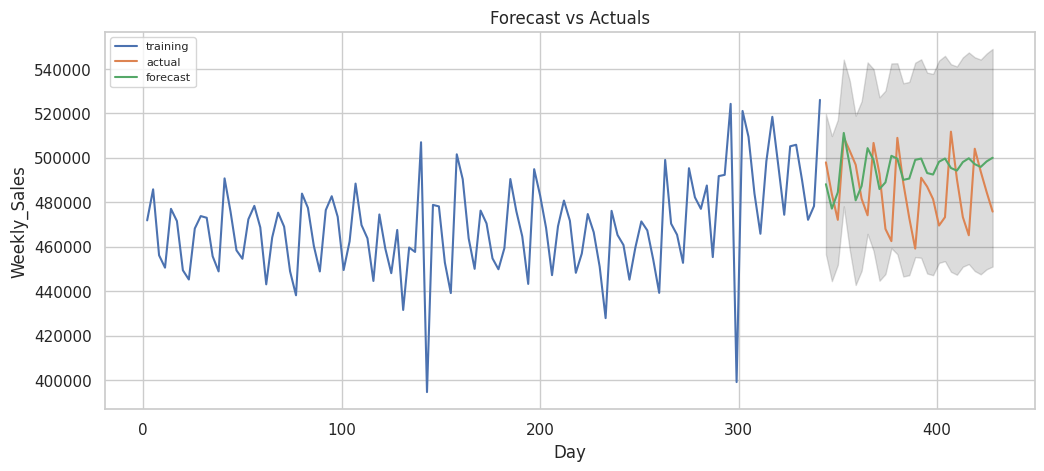

In [18]:
fc, se, conf = model_fit.forecast(len(tst), alpha=0.05)  # 95% conf

fc_series = pd.Series(fc, index=tst.index)
lower_series = pd.Series(conf[:, 0], index=tst.index)
upper_series = pd.Series(conf[:, 1], index=tst.index)

pyplot.figure(figsize=(12,5), dpi=100)
pyplot.plot(trn, label='training')
pyplot.plot(tst, label='actual')
pyplot.plot(fc_series, label='forecast')
pyplot.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
pyplot.title('Forecast vs Actuals')
pyplot.xlabel('Day')
pyplot.ylabel('Weekly_Sales')
pyplot.legend(loc='upper left', fontsize=8)
pyplot.show()

In [19]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  
    return mape
forecast_accuracy(fc,tst)

0.031751080051760895

Random forest regression

In [20]:
df = df3_merged.groupby(['Date','Type'])['Weekly_Sales'].mean().reset_index(name='Weekly_Sales')
df1 = df[df['Type']=='A']

In [21]:
df_shift = pd.DataFrame()
for i in range(52, 0, -1):
   df_shift['t-' + str(i)] = df1['Weekly_Sales'].shift(i)
data = pd.concat([df1, df_shift], axis=1)
data.dropna(inplace=True)
data = data.drop(['Date','Type'], axis=1).reset_index(drop=True)

t = int(len(data)*0.8)
trn = data[:t]
tst = data[t:]
trn_x = trn.loc[:, trn.columns != 'Weekly_Sales']
trn_y = trn['Weekly_Sales']
tst_x = tst.loc[:, tst.columns != 'Weekly_Sales']
tst_y = tst['Weekly_Sales']
#len(trn),len(data)

Accuracy: 97.99 %.
2.014507463692595


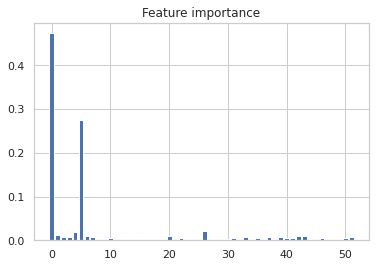

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

model = RandomForestRegressor(n_estimators=100, random_state=20)
model.fit(trn_x, trn_y)
rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(trn_x, trn_y)
y_pred = fit.predict(tst_x)

model.feature_importances_
plt.bar(np.arange(52), model.feature_importances_)
plt.title('Feature importance')

sumvalue=np.sum(tst_y)
mape=np.sum(np.abs((tst_y - y_pred)))/sumvalue*100
accuracy=100-mape
print('Accuracy:', round(accuracy,2),'%.')
print(mape)

Logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

xvars = [0,2,5,6,7,8,9,11,12,13,14,15,16,17]

trn, tst = train_test_split(data_clean, test_size=0.2, random_state= 30)

X_trn = trn.iloc[:,xvars]
y_trn = trn['Level']
print(len(trn),len(tst))

scaler = preprocessing.StandardScaler().fit(X_trn)
X_scaled = scaler.transform(X_trn)

le = preprocessing.LabelEncoder()
le.fit(y_trn)
y_trn = le.transform(y_trn)

logreg = LogisticRegression(penalty='elasticnet',C=1,solver='saga',l1_ratio=0.5)
logreg.fit(X_scaled,y_trn)

1872 468


LogisticRegression(C=1, l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [24]:
#test
from sklearn.metrics import classification_report

X_tst = tst.iloc[:,xvars]
y_tst = tst['Level']

X_tst = scaler.transform(X_tst) 
y_tst = le.transform(y_tst)

score = logreg.score(X_tst, y_tst)
print(score)

y_pred = logreg.predict(X_tst)
print(classification_report(y_tst, y_pred))

0.8782051282051282
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       241
           1       0.89      0.86      0.87       227

    accuracy                           0.88       468
   macro avg       0.88      0.88      0.88       468
weighted avg       0.88      0.88      0.88       468



0.9706253313104356


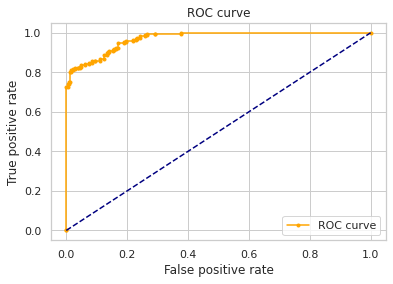

In [25]:
#roc
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score
import matplotlib.pyplot as plt

y_score = logreg.fit(X_scaled,y_trn).decision_function(X_tst)
#print(y_score.shape,y_tst)
fpr, tpr, _ = roc_curve(y_tst, y_score)
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.plot(fpr, tpr, marker='.', label='ROC curve',color='orange')
plt.plot([0,1],[0,1],color='navy',linestyle = '--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc = 'lower right')
plt.show()

In [26]:
#cv
from sklearn.linear_model import LogisticRegressionCV
Cs = [0.01,0.1,1,10,100]
ratios = [0.3,0.5,0.7]
logregcv = LogisticRegressionCV(Cs = Cs, cv = 5, penalty='elasticnet',solver='saga',refit = True, l1_ratios=ratios,random_state = 60)
logregcv.fit(X_scaled,y_trn)

y_pred_cv = logregcv.predict(X_tst)
print(classification_report(y_tst, y_pred_cv))

logregcv.C_ , logregcv.l1_ratio_

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       241
           1       0.89      0.86      0.87       227

    accuracy                           0.88       468
   macro avg       0.88      0.88      0.88       468
weighted avg       0.88      0.88      0.88       468



(array([10.]), array([0.7]))

0.970570493721096


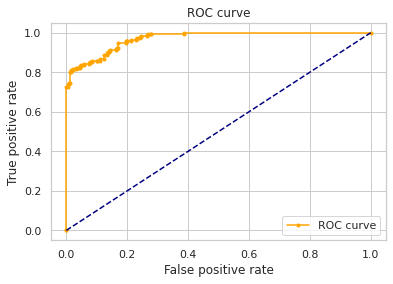

In [27]:
#cv roc
y_score_cv = logregcv.fit(X_scaled,y_trn).decision_function(X_tst)

fpr, tpr, _ = roc_curve(y_tst, y_score_cv)
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.plot(fpr, tpr, marker='.', label='ROC curve',color='orange')
plt.plot([0,1],[0,1],color='navy',linestyle = '--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc = 'lower right')
plt.show()

Support vector machine

In [28]:
from sklearn import svm
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

xvars = [0,2,5,6,7,8,9,11,12,13,14,15,16,17]

trn, tst = train_test_split(data_clean, test_size=0.2, random_state= 30)
X_trn = trn.iloc[:,xvars]
y_trn = trn['Level']
X_tst = tst.iloc[:,xvars]
y_tst = tst['Level']
#print(len(trn))

le = preprocessing.LabelEncoder()
le.fit(y_trn)
y_trn = le.transform(y_trn)
y_tst = le.transform(y_tst)

pipe = Pipeline([('scale', StandardScaler()),('clf', svm.SVC(kernel = 'linear',random_state=50))])

pipe.fit(X_trn, y_trn)
y_pred = pipe.predict(X_tst)
print("Accuracy:", metrics.accuracy_score(y_tst, y_pred))
print(classification_report(y_tst, y_pred))

Accuracy: 0.8867521367521367
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       241
           1       0.91      0.85      0.88       227

    accuracy                           0.89       468
   macro avg       0.89      0.89      0.89       468
weighted avg       0.89      0.89      0.89       468



AUC: 0.9681393605937083


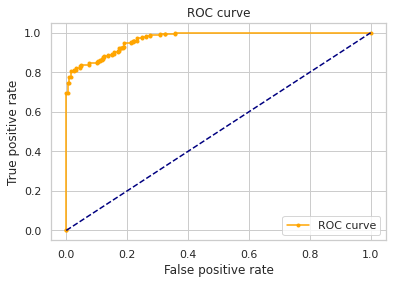

In [29]:
#roc
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score
import matplotlib.pyplot as plt

y_score = pipe.decision_function(X_tst)

fpr, tpr, _ = roc_curve(y_tst, y_score)
roc_auc = auc(fpr, tpr)
print('AUC:',roc_auc)

plt.plot(fpr, tpr, marker='.', label='ROC curve',color='orange')
plt.plot([0,1],[0,1],color='navy',linestyle = '--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc = 'lower right')
plt.show()

In [30]:
#validation
from sklearn.model_selection import GridSearchCV
param_grid = {'clf__C': [0.01, 0.1, 1, 10, 100],
              'clf__gamma': [1., 0.1, 0.01, 0.001, 0.0001],
              'clf__kernel': ['rbf','linear']}
grid = GridSearchCV(pipe, param_grid, refit = True, verbose = 1) 
grid.fit(X_trn, y_trn)
print(grid.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'clf__C': 10, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}


In [31]:
grid_predictions = grid.predict(X_tst)
print("Accuracy:",metrics.accuracy_score(y_tst, grid_predictions))
print(classification_report(y_tst, grid_predictions))

Accuracy: 0.9358974358974359
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       241
           1       0.93      0.94      0.93       227

    accuracy                           0.94       468
   macro avg       0.94      0.94      0.94       468
weighted avg       0.94      0.94      0.94       468



AUC: 0.9792713912296416


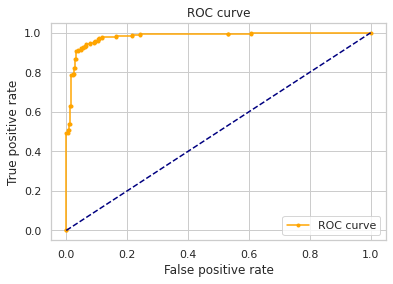

In [32]:
#roc
y_score_grid = grid.decision_function(X_tst)

fpr, tpr, _ = roc_curve(y_tst, y_score_grid)
roc_auc = auc(fpr, tpr)
print('AUC:',roc_auc)

plt.plot(fpr, tpr, marker='.', label='ROC curve',color='orange')
plt.plot([0,1],[0,1],color='navy',linestyle = '--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc = 'lower right')
plt.show()